In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Carseats.csv to Carseats (3).csv


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import io
import numpy as np

carseats_df = pd.read_csv(io.StringIO(uploaded['Carseats.csv'].decode('utf-8')))
carseats_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
carseats_df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
carseats_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
carseats_df['Education'] = carseats_df['Education'].astype(str)

In [ ]:
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

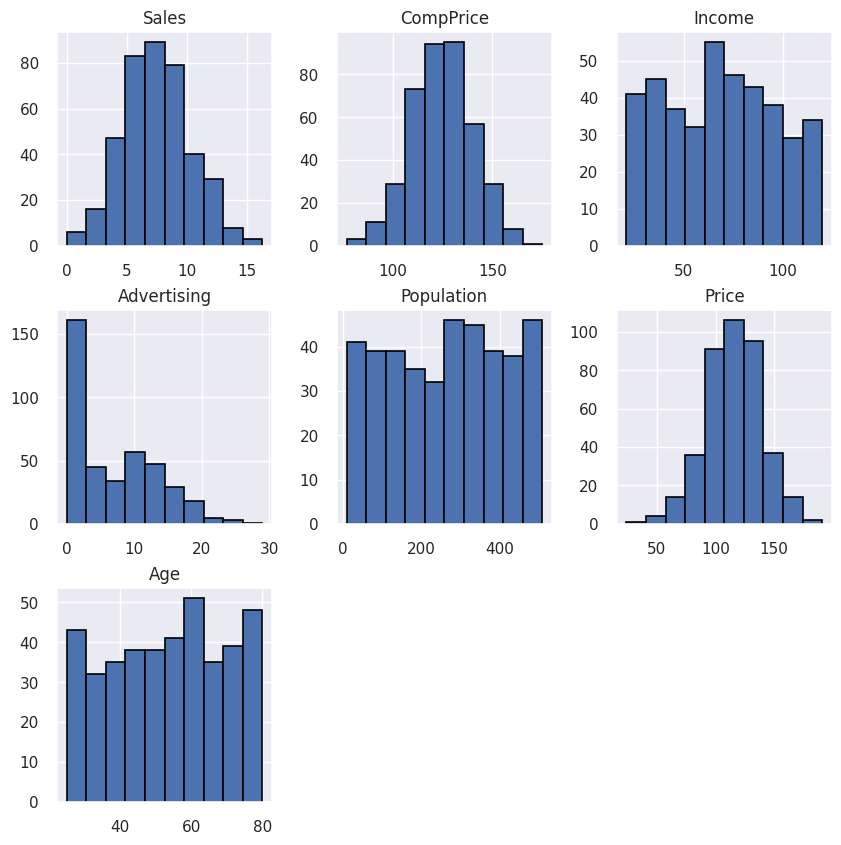

In [ ]:
# Visulazing the distibution of the data for every feature
carseats_df.hist(edgecolor='black', linewidth=1.2, figsize=(10, 10))

In [ ]:
# Target Sales : Skewness check
carseats_df['Sales'].skew()

0.18556036318721578

In [ ]:
# Categorical features : Value check
cat_cols = ['Education', 'ShelveLoc', 'Urban', 'US']
for col in cat_cols:
    print(f"Feature Name {col} : \n{carseats_df[col].value_counts()}")

Feature Name Education : 
17    49
12    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: Education, dtype: int64
Feature Name ShelveLoc : 
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Feature Name Urban : 
Yes    282
No     118
Name: Urban, dtype: int64
Feature Name US : 
Yes    258
No     142
Name: US, dtype: int64


<Axes: xlabel='Education', ylabel='Sales'>

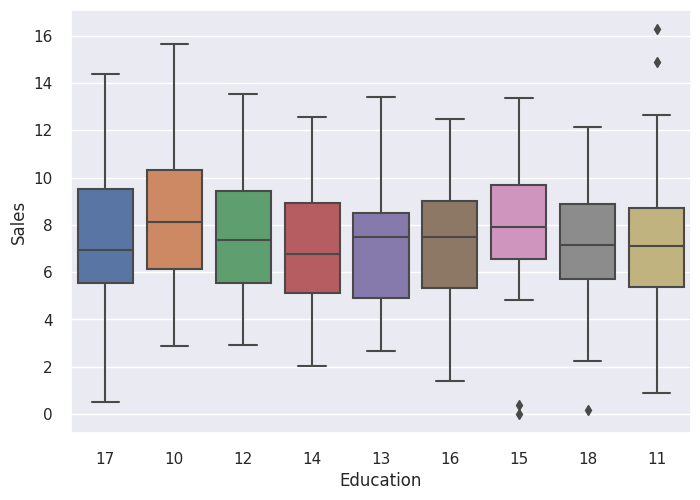

In [ ]:
#Education
sns.boxplot(x="Education", y="Sales", data=carseats_df)

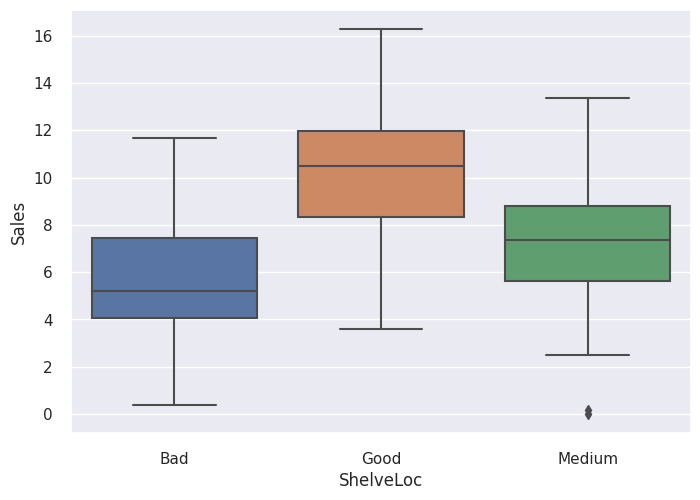

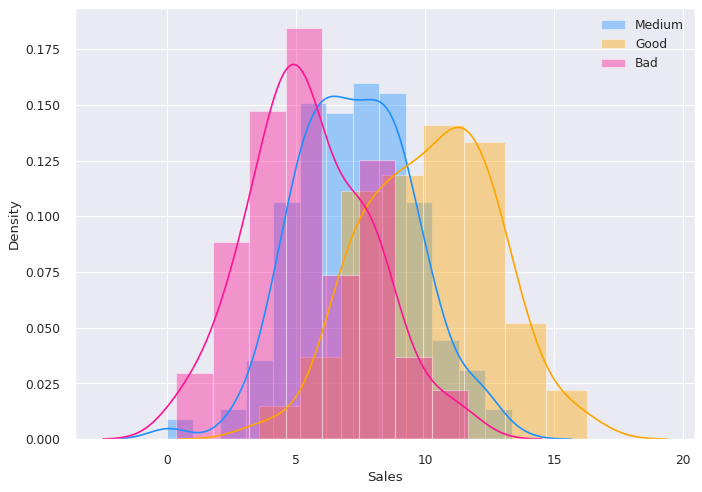

In [ ]:
#ShelveLoc
sns.boxplot(x="ShelveLoc", y="Sales", data=carseats_df)
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(carseats_df['Sales'].loc[carseats_df['ShelveLoc'] == 'Medium'], color="dodgerblue", label="Medium")
sns.distplot(carseats_df['Sales'].loc[carseats_df['ShelveLoc'] == 'Good'], color="orange", label="Good")
sns.distplot(carseats_df['Sales'].loc[carseats_df['ShelveLoc'] == 'Bad'], color="deeppink", label="Bad")
plt.legend()

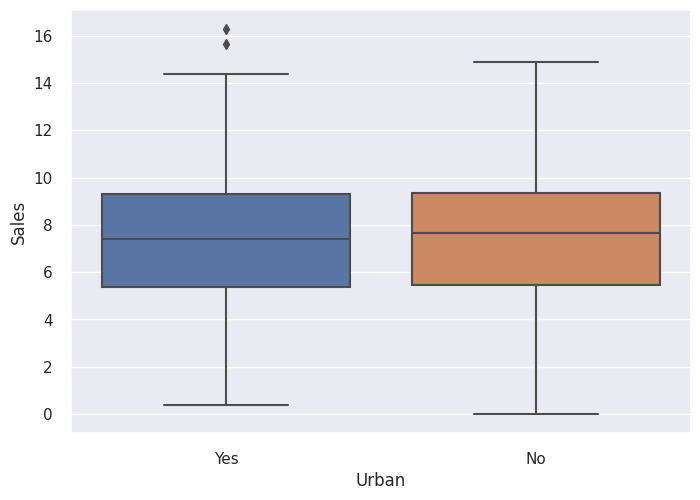

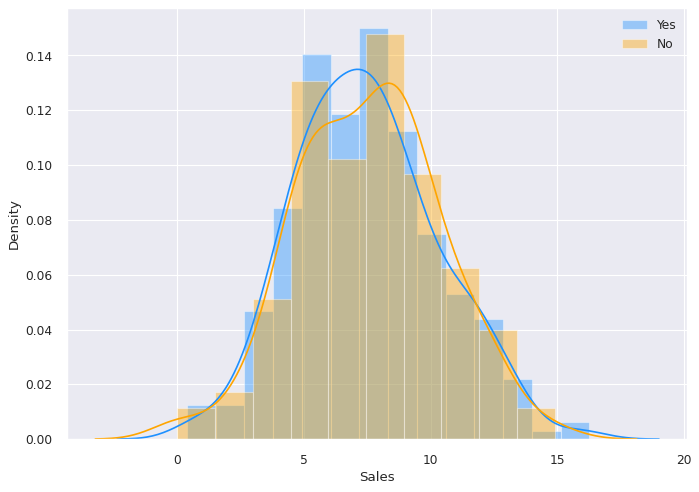

In [ ]:
#Urban
sns.boxplot(x="Urban", y="Sales", data=carseats_df)
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(carseats_df['Sales'].loc[carseats_df['Urban'] == 'Yes'], color="dodgerblue", label="Yes")
sns.distplot(carseats_df['Sales'].loc[carseats_df['Urban'] == 'No'], color="orange", label="No")
plt.legend()

<Axes: >

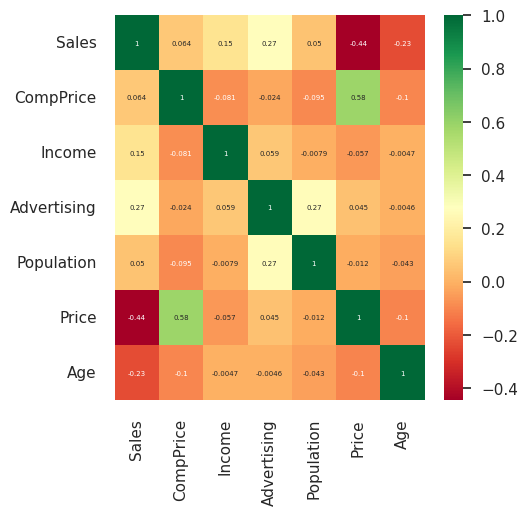

In [ ]:
#find correlation between continuous variables and Sales
plt.figure(figsize=(5, 5))
sns.heatmap(carseats_df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":5})

In [ ]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))

In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """
    
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)

In [ ]:
split_criterion = 'entropy'
for feature in carseats_df.drop(columns='Sales').columns:
    feature_info_gain = comp_feature_information_gain(carseats_df, 'Sales', feature, split_criterion)

target feature: Sales
descriptive_feature: CompPrice
split criterion: entropy
impurity of partitions: [3.17, 3.17, 3.0, 3.17, 2.585, 3.322, 3.585, 3.0, 3.585, 3.875, 3.807, 3.17, 2.0, 3.322, 2.0, 1.585, 2.322, 3.459, 3.459, 3.459, 2.0, 2.807, 2.585, 2.0, 2.322, 2.322, 3.807, 2.322, 3.585, 2.807, 1.0, -0.0, 3.7, -0.0, 2.585, 2.322, 3.459, 1.0, 1.585, 2.0, 3.322, 1.585, -0.0, 1.585, 1.0, 2.0, 2.0, -0.0, 1.0, 1.0, -0.0, -0.0, 3.17, 2.322, -0.0, 2.585, 1.0, 2.0, 2.0, 2.0, 2.0, 2.322, 2.807, 2.0, -0.0, -0.0, 1.0, -0.0, 1.0, 1.0, -0.0, -0.0, 1.0]
weights of partitions: [0.022, 0.022, 0.02, 0.022, 0.015, 0.025, 0.03, 0.02, 0.03, 0.04, 0.035, 0.022, 0.01, 0.025, 0.01, 0.007, 0.013, 0.028, 0.028, 0.028, 0.01, 0.018, 0.015, 0.01, 0.013, 0.013, 0.035, 0.013, 0.03, 0.018, 0.005, 0.003, 0.033, 0.003, 0.015, 0.013, 0.028, 0.005, 0.007, 0.01, 0.025, 0.007, 0.003, 0.007, 0.005, 0.01, 0.01, 0.003, 0.005, 0.005, 0.003, 0.003, 0.022, 0.013, 0.003, 0.015, 0.005, 0.01, 0.01, 0.01, 0.01, 0.013, 0.018, 0.01,

In [ ]:
split_criteria = 'gini'
for feature in carseats_df.drop(columns='Sales').columns:
    feature_info_gain = comp_feature_information_gain(carseats_df, 'Sales', feature, split_criteria)

target feature: Sales
descriptive_feature: CompPrice
split criterion: gini
impurity of partitions: [0.889, 0.889, 0.875, 0.889, 0.833, 0.9, 0.917, 0.875, 0.917, 0.93, 0.929, 0.889, 0.75, 0.9, 0.75, 0.667, 0.8, 0.909, 0.909, 0.909, 0.75, 0.857, 0.833, 0.75, 0.8, 0.8, 0.929, 0.8, 0.917, 0.857, 0.5, 0.0, 0.923, 0.0, 0.833, 0.8, 0.909, 0.5, 0.667, 0.75, 0.9, 0.667, 0.0, 0.667, 0.5, 0.75, 0.75, 0.0, 0.5, 0.5, 0.0, 0.0, 0.889, 0.8, 0.0, 0.833, 0.5, 0.75, 0.75, 0.75, 0.75, 0.8, 0.857, 0.75, 0.0, 0.0, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 0.5]
weights of partitions: [0.022, 0.022, 0.02, 0.022, 0.015, 0.025, 0.03, 0.02, 0.03, 0.04, 0.035, 0.022, 0.01, 0.025, 0.01, 0.007, 0.013, 0.028, 0.028, 0.028, 0.01, 0.018, 0.015, 0.01, 0.013, 0.013, 0.035, 0.013, 0.03, 0.018, 0.005, 0.003, 0.033, 0.003, 0.015, 0.013, 0.028, 0.005, 0.007, 0.01, 0.025, 0.007, 0.003, 0.007, 0.005, 0.01, 0.01, 0.003, 0.005, 0.005, 0.003, 0.003, 0.022, 0.013, 0.003, 0.015, 0.005, 0.01, 0.01, 0.01, 0.01, 0.013, 0.018, 0.01, 0.003, 0.003

In [ ]:
carseats_df
carseats_df1 = carseats_df[['Population','Price', 'Age', 'Sales']]
carseats_df2 = carseats_df[['Population','Price', 'Age', 'Sales']]
carseats_df1

,Population,Price,Age,Sales
0,276,120,42,9.50
1,260,83,65,11.22
2,269,80,59,10.06
3,466,97,55,7.40
4,340,128,38,4.15
...,...,...,...,...
395,203,128,33,12.57
396,37,120,55,6.14
397,368,159,40,7.41
398,284,95,50,5.94


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the label encoder
label_encoder = LabelEncoder()

# Convert the float column to integer using the label encoder
carseats_df2['Population'] = label_encoder.fit_transform(carseats_df2['Population'].astype(int))
carseats_df2['Price'] = label_encoder.fit_transform(carseats_df2['Price'].astype(int))
carseats_df2['Age'] = label_encoder.fit_transform(carseats_df2['Age'].astype(int))
carseats_df2['Sales'] = label_encoder.fit_transform(carseats_df2['Sales'].astype(int))

In [ ]:
carseats_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  400 non-null    int64
 1   Price       400 non-null    int64
 2   Age         400 non-null    int64
 3   Sales       400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [ ]:
#Get Dummies
X = carseats_df2.drop(['Population','Price', 'Age'], axis=1)
y = carseats_df2['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train features shape: {}'.format(X_train.shape))
print('Train labels shape: {}'.format(y_train.shape))
print('Test features shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

Train features shape: (280, 1)
Train labels shape: (280,)
Test features shape: (120, 1)
Test labels shape: (120,)


In [ ]:
#USING entropy  Load libraries
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=2, min_samples_split=2, max_depth=3, random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('Error', np.sqrt(mean_squared_error(y_test, y_pred)))

Error 0.8266397845091497


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.775


In [ ]:
#3.1.3 Tree Visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X.columns)

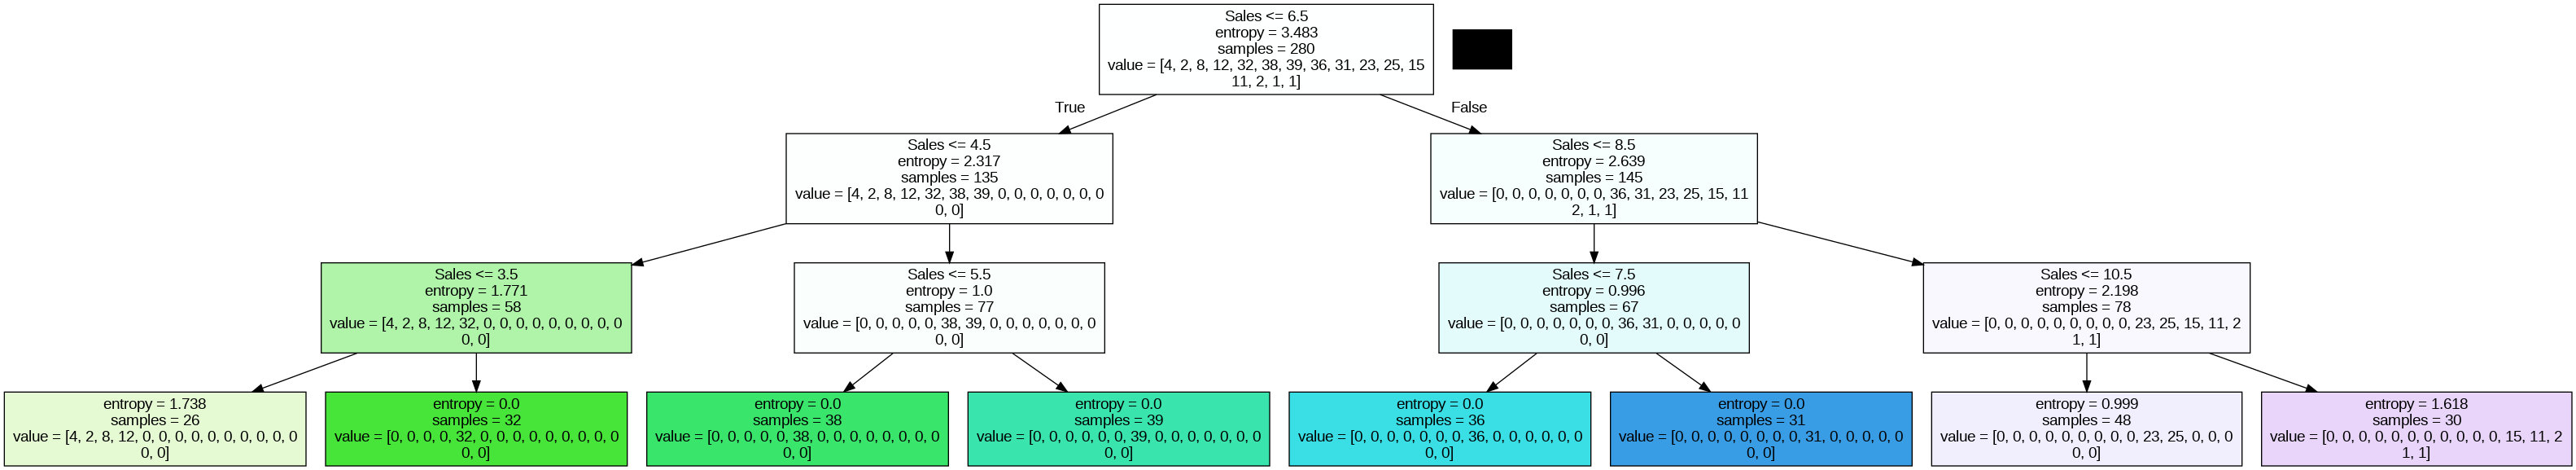

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
# Load libraries USING GINI
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2, min_samples_split=2, max_depth=3, random_state=42)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)
print('Error', np.sqrt(mean_squared_error(y_test, y_pred)))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Error 1.179689224612426
Accuracy: 0.6583333333333333


In [ ]:
#3.1.3 Tree Visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X.columns)

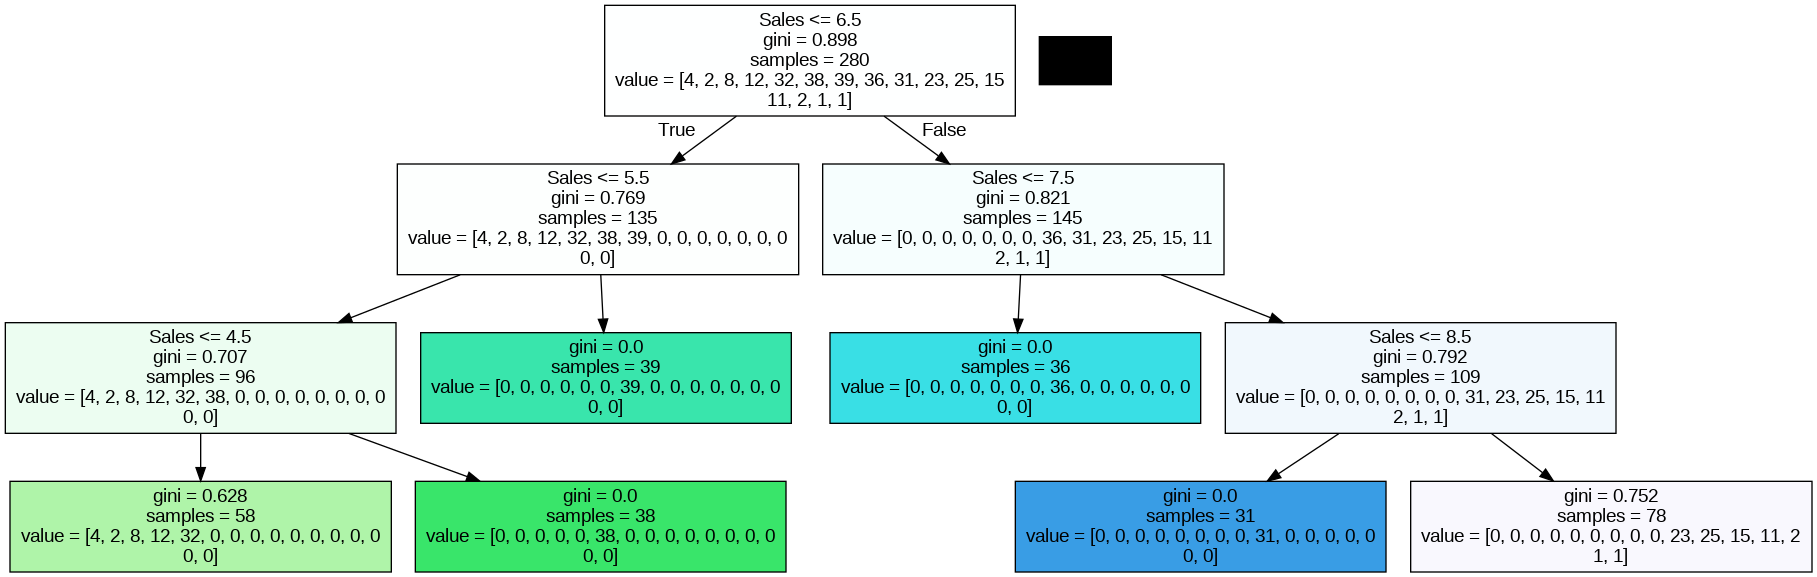

In [ ]:
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

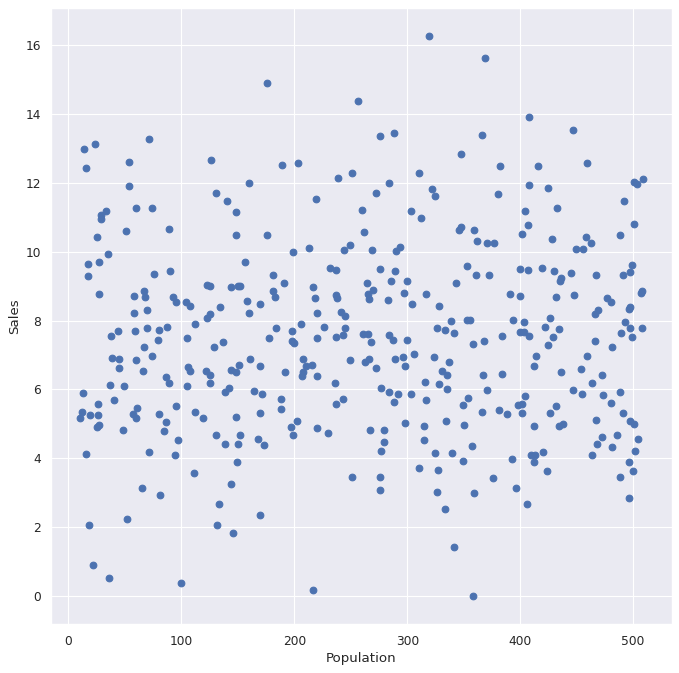

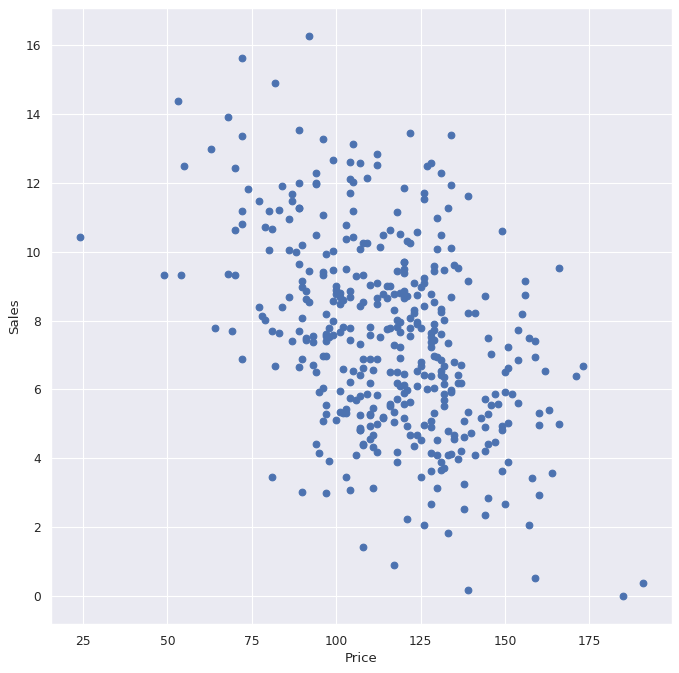

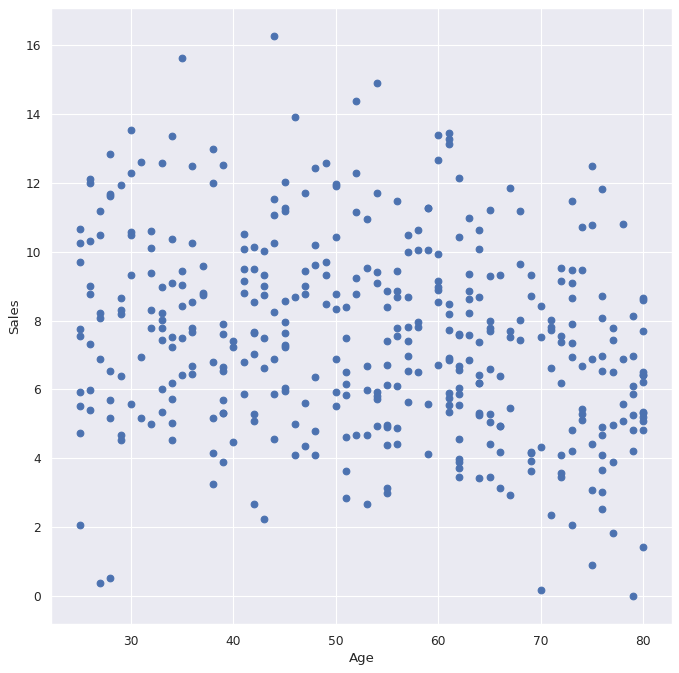

In [ ]:
## Visulazing the distibution of the data for every feature with Sales
cont_cols = ['Population','Price', 'Age']
for col in cont_cols:
    plt.figure(figsize=(10,10), dpi= 80)
    plt.scatter(x=col, y='Sales', data=carseats_df1)
    plt.xlabel(f"{col}")
    plt.ylabel('Sales')
    plt.show()

SIMPLE DECISION TREE REGRESSOR

In [ ]:
#3.1.3 Tree Visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X1.columns)

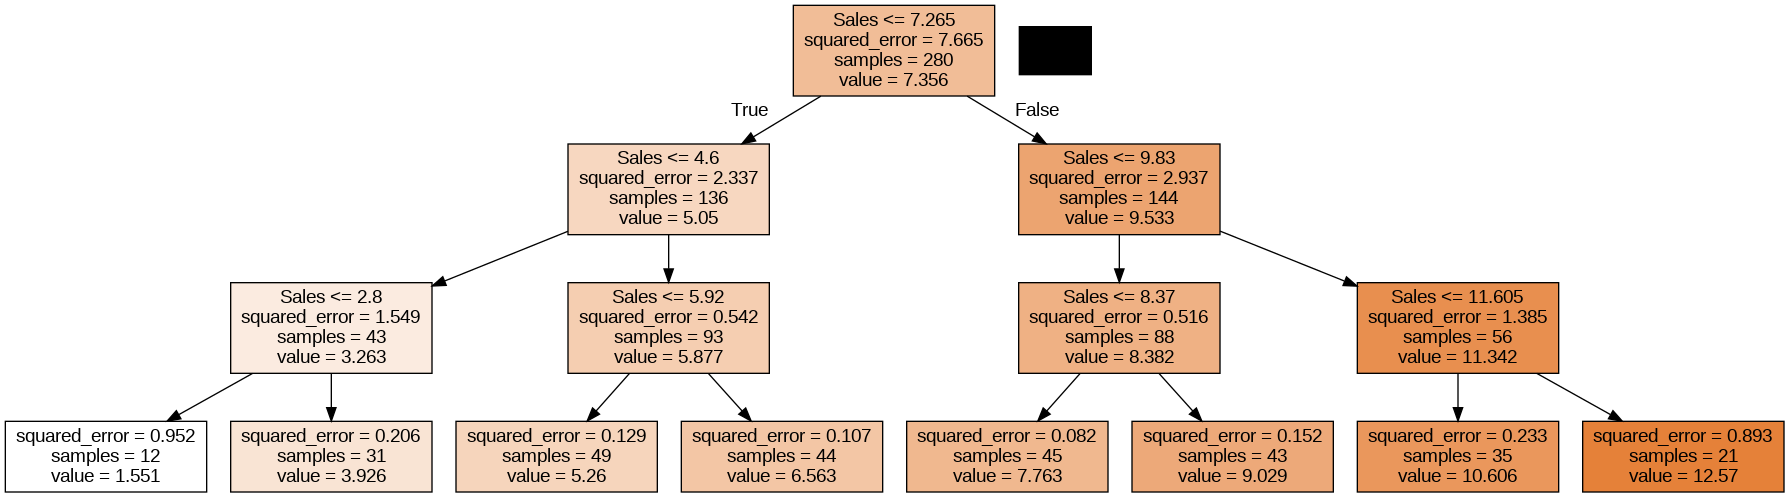

In [ ]:
dot_data = StringIO()
export_graphviz(reg_dt, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Carseats.csv to Carseats (7).csv


In [290]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import io
import numpy as np

carseats_dfnn = pd.read_csv(io.StringIO(uploaded['Carseats.csv'].decode('utf-8')))
carseats_dfnn

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
from sklearn import tree
import graphviz
from sklearn import metrics


In [ ]:

#carseats_dfnn = carseats_dfnn[['Price','Sales']]
carseats_dfnn = carseats_dfnn[['Population','Price', 'Age', 'Sales']]
carseats_dfnn

,Population,Price,Age,Sales
0,276,120,42,9.50
1,260,83,65,11.22
2,269,80,59,10.06
3,466,97,55,7.40
4,340,128,38,4.15
...,...,...,...,...
395,203,128,33,12.57
396,37,120,55,6.14
397,368,159,40,7.41
398,284,95,50,5.94


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the label encoder
label_encoder = LabelEncoder()

# Convert the float column to integer using the label encoder
carseats_dfnn['Population'] = label_encoder.fit_transform(carseats_dfnn['Population'].astype(int))
carseats_dfnn['Price'] = label_encoder.fit_transform(carseats_dfnn['Price'].astype(int))
carseats_dfnn['Age'] = label_encoder.fit_transform(carseats_dfnn['Age'].astype(int))
carseats_dfnn['Sales'] = label_encoder.fit_transform(carseats_dfnn['Sales'].astype(int))

In [ ]:
carseats_dfnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  400 non-null    int64
 1   Price       400 non-null    int64
 2   Age         400 non-null    int64
 3   Sales       400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [ ]:
#Get Dummies
Xnn = carseats_dfnn.drop(['Population','Price', 'Age'], axis=1)
ynn = carseats_dfnn['Sales']

In [292]:
X_trainn, X_testnn, y_trainn, y_testnn = train_test_split(Xnn, ynn, test_size=0.3, random_state=42)

print('Train features shape: {}'.format(X_trainn.shape))
print('Train labels shape: {}'.format(y_trainn.shape))
print('Test features shape: {}'.format(X_testnn.shape))
print('Test labels shape: {}'.format(y_testnn.shape))

Train features shape: (280, 1)
Train labels shape: (280,)
Test features shape: (120, 1)
Test labels shape: (120,)


In [ ]:
#USING entropy  Load libraries
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clfnn = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfnn = clfnn.fit(X_trainn,y_trainn)

#Predict the response for test dataset
y_prednn = clfnn.predict(X_testnn)
print('Error', np.sqrt(mean_squared_error(y_testnn, y_prednn)))

Error 0.09128709291752768


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testnn, y_prednn))

Accuracy: 0.9916666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testnn, y_prednn)
print(cm)

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]]


In [296]:
from sklearn.metrics import classification_report

print(classification_report(y_testnn, y_prednn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

    accuracy                           0.99       120
   macro avg       0.88   

KNN APPLICATIO

In [ ]:
#applying K-nn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
#Get Dummies
Xknn = carseats_dfnn.drop(['Population','Price', 'Age'], axis=1)
yknn = carseats_dfnn['Sales']

In [ ]:
X_traiknn, X_testknn, y_traiknn, y_testknn = train_test_split(Xknn, yknn, test_size=0.3, random_state=42)

print('Train features shape: {}'.format(X_traiknn.shape))
print('Train labels shape: {}'.format(y_traiknn.shape))
print('Test features shape: {}'.format(X_testknn.shape))
print('Test labels shape: {}'.format(y_testknn.shape))

Train features shape: (280, 1)
Train labels shape: (280,)
Test features shape: (120, 1)
Test labels shape: (120,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_traiknn, y_traiknn)
y_pred1nn = knn.predict(X_testknn)
print('Error', np.sqrt(mean_squared_error(y_testknn, y_pred1nn)))

Error 0.3535533905932738


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy  of Nearest neighbor:",metrics.accuracy_score(y_testknn, y_pred1nn))

Accuracy  of Nearest neighbor: 0.9416666666666667


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_testknn, y_pred1nn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         7
          12       0.50      1.00      0.67         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.94       120
   macro avg       0.77      0.80      0.78       120
weighted avg       0.92   

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_testnn, y_prednn, pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_testknn, y_pred1nn, pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_testnn))]
p_fpr, p_tpr, _ = roc_curve(y_testnn, random_probs, pos_label=0)

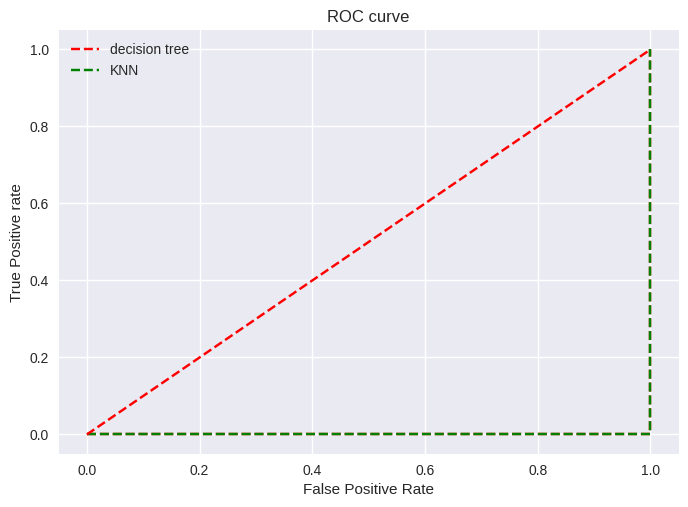

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='decision tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();